# Curso: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

# Práctica dirigida: Representación y Selección 


In [78]:
from __future__ import annotations
import math
import numpy as np
from enum import Enum
from bin_repr import dec2bin, bin2gray, my_map, inverse_map, bin2dec, gray2bin
import copy
import random 
import matplotlib.pyplot as plt
from typing import Callable,  NamedTuple
from itertools import combinations
from abc import ABC, abstractmethod

class Representation(Enum):
    BIN = 0
    GRAY = 1
    DECIMAL = 2

# Problemas de optimización
Este laboratorio se mostrará varios métodos de selección como la selección proporcional, ranking lineal, torneo, uniforme y selección ruleta, luego se medirá la intensidad de selección en un problema de minimización.


## 1. Dado los siguientes problemas de minimización de una función $\min_\mathbf{x}f(\mathbf{x})$


In [79]:
f1 = lambda x: x[0]**4 + 5*x[0]**3 + 4*x[0]**2 - 4*x[0] + 1
f2 = lambda x: 0.2 + x[0]**2 + x[1]**2 - 0.1*math.cos(6*math.pi*x[0]) - 0.1*math.sin(6*math.pi*x[1])
f3 = lambda x: math.pow(1/6.931 - x[0]*x[1]/(x[2]*x[3]), 2)


Dominio

In [80]:
domain_1, n_var_1 = [-4.0, 1], 1
domain_2, n_var_2 = [-1, 1.0], 2
domain_3, n_var_3 = [12, 60.], 4


Parámetros del individuo tipados

In [81]:
class IndividualArguments(NamedTuple):
    domain: tuple[int, int]
    eps: float
    n_var: int
    gen_size: int
    default_repr: Representation = Representation.DECIMAL


Clase individuo 

In [82]:
class Individual():
    def __init__(self, phenotype: list[float], args: IndividualArguments):
        self.domain = args.domain
        self.eps = args.eps
        self.n_var = args.n_var
        self.gen_size = args.gen_size
        self.default_repr = args.default_repr
        self.phenotype = phenotype

    def getGenotype(self, my_repr: Representation = None):
        my_repr = self.default_repr if my_repr == None else my_repr
        list_repr: list[int] = []
        if my_repr == Representation.BIN:
            for gen in self.phenotype:
                list_repr.extend(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps),
                                         bits=self.gen_size))
        elif my_repr == Representation.GRAY:
            for gen in self.phenotype:
                list_repr.extend(bin2gray(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps),
                                                  bits=self.gen_size)))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, args: IndividualArguments):
        phenotype: list[int] = []
        if args.default_repr == Representation.BIN:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gen), args.domain[0], args.eps))
        elif args.default_repr == Representation.GRAY:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gray2bin(gen)), args.domain[0], args.eps))
        else:
            phenotype = copy.deepcopy(genotype)

        return cls(phenotype, args)

    @staticmethod
    def newLike(genotype: list[int], parent: Individual):
        args = IndividualArguments(parent.domain, parent.eps, parent.n_var, parent.gen_size, parent.default_repr)
        return Individual.new(genotype, args)

    @classmethod
    def newRandom(cls, args: IndividualArguments):
        phenotype = [round(random.uniform(args.domain[0], args.domain[1]), 6) for _ in range(args.n_var)]
        return cls(phenotype, args)


### a) Representación del problema (1)
Implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dígitos (10 bits) y muestre/imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [83]:
POPULATION_SIZE = 10
GEN_SIZE_1 = 10
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
N_POINTS_1 = 2**GEN_SIZE_1

args1 = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1)

population_1 = [Individual.newRandom(args1) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")


Representación binaria
Genotipo 0 = [1, 0, 0, 1, 0, 1, 0, 1, 0, 1] Fenotipo 0 = [-1.080576]
Genotipo 1 = [0, 1, 0, 0, 1, 1, 1, 1, 1, 1] Fenotipo 1 = [-2.44229]
Genotipo 2 = [1, 0, 0, 0, 0, 0, 0, 1, 1, 0] Fenotipo 2 = [-1.469932]
Genotipo 3 = [0, 0, 1, 0, 1, 1, 1, 0, 0, 1] Fenotipo 3 = [-3.098116]
Genotipo 4 = [0, 0, 0, 0, 1, 1, 0, 0, 0, 1] Fenotipo 4 = [-3.761818]
Genotipo 5 = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0] Fenotipo 5 = [0.165734]
Genotipo 6 = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] Fenotipo 6 = [-0.668703]
Genotipo 7 = [0, 0, 1, 0, 1, 1, 1, 1, 1, 1] Fenotipo 7 = [-3.068424]
Genotipo 8 = [0, 1, 1, 0, 1, 0, 1, 1, 1, 0] Fenotipo 8 = [-1.896865]
Genotipo 9 = [1, 1, 0, 1, 1, 0, 0, 1, 1, 0] Fenotipo 9 = [0.252068]


Realizar lo mismo del ítem anterior para la representación en código de Gray.

In [84]:
print("Representación en código Gray")
for i, ind in enumerate(population_1):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [1, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fenotipo 0 = [-1.080576]
Genotipo 1 = [0, 1, 1, 0, 1, 0, 0, 0, 0, 0] Fenotipo 1 = [-2.44229]
Genotipo 2 = [1, 1, 0, 0, 0, 0, 0, 1, 0, 1] Fenotipo 2 = [-1.469932]
Genotipo 3 = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1] Fenotipo 3 = [-3.098116]
Genotipo 4 = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1] Fenotipo 4 = [-3.761818]
Genotipo 5 = [1, 0, 1, 1, 1, 1, 1, 1, 1, 0] Fenotipo 5 = [0.165734]
Genotipo 6 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] Fenotipo 6 = [-0.668703]
Genotipo 7 = [0, 0, 1, 1, 1, 0, 0, 0, 0, 0] Fenotipo 7 = [-3.068424]
Genotipo 8 = [0, 1, 0, 1, 1, 1, 1, 0, 0, 1] Fenotipo 8 = [-1.896865]
Genotipo 9 = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1] Fenotipo 9 = [0.252068]


Considerando las representaciones anteriores (cadena de 10 bits) ¿cual sería el tamaño del espacio intrínseco?


In [85]:
print(f"El espacio intrinseco tendría {N_POINTS_1} elementos con una precisión de {eps_1}")

El espacio intrinseco tendría 1024 elementos con una precisión de 0.004887585532746823


### b) Representación del problema (2):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x, y$ estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su
representación binaria.

In [86]:
POPULATION_SIZE = 10
GEN_SIZE_2 = 5
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
N_POINTS_2 = 2**GEN_SIZE_2

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2)

population_2 = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 0, 1, 1, 0, 0, 1, 1, 0, 0] Fenotipo 0 = [0.428385, -0.211371]
Genotipo 1 = [1, 1, 1, 0, 1, 0, 1, 1, 0, 0] Fenotipo 1 = [0.847774, -0.215594]
Genotipo 2 = [1, 1, 1, 1, 1, 0, 1, 1, 0, 1] Fenotipo 2 = [0.98064, -0.178234]
Genotipo 3 = [1, 0, 1, 1, 0, 0, 0, 1, 1, 1] Fenotipo 3 = [0.414868, -0.516437]
Genotipo 4 = [0, 1, 0, 1, 1, 1, 1, 1, 1, 1] Fenotipo 4 = [-0.320682, 0.995783]
Genotipo 5 = [1, 1, 0, 0, 0, 0, 1, 0, 1, 1] Fenotipo 5 = [0.570493, -0.294189]
Genotipo 6 = [0, 0, 1, 0, 0, 0, 0, 0, 1, 1] Fenotipo 6 = [-0.756471, -0.800671]
Genotipo 7 = [1, 1, 0, 1, 1, 0, 0, 0, 0, 0] Fenotipo 7 = [0.730703, -0.979476]
Genotipo 8 = [0, 1, 1, 1, 0, 1, 0, 1, 1, 1] Fenotipo 8 = [-0.112721, 0.473505]
Genotipo 9 = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1] Fenotipo 9 = [0.23646, 0.459591]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [87]:
print("Representación en código Gray")
for i, ind in enumerate(population_2):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Representación en código Gray
Genotipo 0 = [1, 1, 1, 0, 1, 0, 1, 0, 1, 0] Fenotipo 0 = [0.428385, -0.211371]
Genotipo 1 = [1, 0, 0, 1, 1, 0, 1, 0, 1, 0] Fenotipo 1 = [0.847774, -0.215594]
Genotipo 2 = [1, 0, 0, 0, 0, 0, 1, 0, 1, 1] Fenotipo 2 = [0.98064, -0.178234]
Genotipo 3 = [1, 1, 1, 0, 1, 0, 0, 1, 0, 0] Fenotipo 3 = [0.414868, -0.516437]
Genotipo 4 = [0, 1, 1, 1, 0, 1, 0, 0, 0, 0] Fenotipo 4 = [-0.320682, 0.995783]
Genotipo 5 = [1, 0, 1, 0, 0, 0, 1, 1, 1, 0] Fenotipo 5 = [0.570493, -0.294189]
Genotipo 6 = [0, 0, 1, 1, 0, 0, 0, 0, 1, 0] Fenotipo 6 = [-0.756471, -0.800671]
Genotipo 7 = [1, 0, 1, 1, 0, 0, 0, 0, 0, 0] Fenotipo 7 = [0.730703, -0.979476]
Genotipo 8 = [0, 1, 0, 0, 1, 1, 1, 1, 0, 0] Fenotipo 8 = [-0.112721, 0.473505]
Genotipo 9 = [1, 1, 0, 1, 0, 1, 1, 1, 0, 0] Fenotipo 9 = [0.23646, 0.459591]


Realizar lo mismo del ítem anterior para la representación real

In [88]:
print("Representación real")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.phenotype}")

Representación real
Individuo 0 = [0.428385, -0.211371]
Individuo 1 = [0.847774, -0.215594]
Individuo 2 = [0.98064, -0.178234]
Individuo 3 = [0.414868, -0.516437]
Individuo 4 = [-0.320682, 0.995783]
Individuo 5 = [0.570493, -0.294189]
Individuo 6 = [-0.756471, -0.800671]
Individuo 7 = [0.730703, -0.979476]
Individuo 8 = [-0.112721, 0.473505]
Individuo 9 = [0.23646, 0.459591]


Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual sería el tamaño del espacio intrínseco?


In [89]:
print(f"El espacio intrinseco tendría {N_POINTS_2} x {N_POINTS_2} = {2**(2*GEN_SIZE_2)} elementos con una precisión de {eps_2}")

El espacio intrinseco tendría 32 x 32 = 1024 elementos con una precisión de 0.06451612903225806


### c) Representación del problema (3):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x_1, x_2, x_3, x_4$ estén representados por 6 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.


In [90]:
POPULATION_SIZE = 10
GEN_SIZE_3 = 6
eps_3 = (60 - 12) / (2**GEN_SIZE_3 - 1)
N_POINTS_3 = 2**GEN_SIZE_3

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3)

population_3 = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.BIN)} Fenotipo {i} = {ind.phenotype}")

Representación binaria
Genotipo 0 = [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1] Fenotipo 0 = [52.604429, 35.609582, 29.657452, 41.944754]
Genotipo 1 = [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0] Fenotipo 1 = [44.965925, 50.627427, 32.613418, 39.11783]
Genotipo 2 = [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0] Fenotipo 2 = [29.237273, 22.056264, 19.443962, 19.555951]
Genotipo 3 = [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0] Fenotipo 3 = [58.309484, 43.354037, 34.26657, 31.720863]
Genotipo 4 = [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1] Fenotipo 4 = [49.219981, 32.378944, 55.08441, 41.485381]
Genotipo 5 = [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0] Fenotipo 5 = [13.788812, 46.448342, 59.615413, 33.481322]
Genotipo 6 = [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1] Fenotipo 6 = [34.107324, 29.50

Realizar lo mismo del ítem anterior para la representación en código de Gray

In [91]:
for i, ind in enumerate(population_3):
    print(f"Genotipo {i} = {ind.getGenotype(Representation.GRAY)} Fenotipo {i} = {ind.phenotype}")

Genotipo 0 = [1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0] Fenotipo 0 = [52.604429, 35.609582, 29.657452, 41.944754]
Genotipo 1 = [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0] Fenotipo 1 = [44.965925, 50.627427, 32.613418, 39.11783]
Genotipo 2 = [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1] Fenotipo 2 = [29.237273, 22.056264, 19.443962, 19.555951]
Genotipo 3 = [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1] Fenotipo 3 = [58.309484, 43.354037, 34.26657, 31.720863]
Genotipo 4 = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0] Fenotipo 4 = [49.219981, 32.378944, 55.08441, 41.485381]
Genotipo 5 = [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0] Fenotipo 5 = [13.788812, 46.448342, 59.615413, 33.481322]
Genotipo 6 = [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1] Fenotipo 6 = [34.107324, 29.505308, 18.907035, 30.737

Realizar lo mismo del ítem anterior para la representación real.

In [92]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [52.604429, 35.609582, 29.657452, 41.944754]
Individuo 1 = [44.965925, 50.627427, 32.613418, 39.11783]
Individuo 2 = [29.237273, 22.056264, 19.443962, 19.555951]
Individuo 3 = [58.309484, 43.354037, 34.26657, 31.720863]
Individuo 4 = [49.219981, 32.378944, 55.08441, 41.485381]
Individuo 5 = [13.788812, 46.448342, 59.615413, 33.481322]
Individuo 6 = [34.107324, 29.505308, 18.907035, 30.737697]
Individuo 7 = [25.972368, 18.748608, 49.632096, 45.6293]
Individuo 8 = [59.880755, 34.037059, 17.765377, 53.903455]
Individuo 9 = [29.80593, 15.015497, 32.024022, 51.351795]


Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrínseco

In [93]:
print(f"El espacio intrinseco tendría {N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}x{N_POINTS_3}={2**(4*GEN_SIZE_3)} elementos con una precisión de {eps_3}")

El espacio intrinseco tendría 64x64x64x64=16777216 elementos con una precisión de 0.7619047619047619


## 2. Gestión de la población: de la teoría se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:

## Selection

In [94]:
class Selection(ABC):
    def __init__(self, num_individuals: int):
        self.num_individuals = num_individuals

    @abstractmethod
    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pass

    @staticmethod
    def intensity(prev_fitness: list[float], curr_fitness: list[float]):
        prev_fitness = np.array(prev_fitness)
        curr_fitness = np.array(curr_fitness)
        mean_prev = np.mean(prev_fitness)   # f
        mean_curr = np.mean(curr_fitness)   # g
        std_prev = np.std(prev_fitness)     # f 
        return (mean_curr - mean_prev) / std_prev if std_prev != 0.0 else 0.0


De una población de 10 individuos se seleccionarán 5 individuos del problema 2

In [95]:
POPULATION_SIZE = 10
SELECTED_SIZE = 5
args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
fitness_population = [f2(ind.phenotype) for ind in initial_population]
for i, ind in enumerate(initial_population):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [0.434562, -0.337903]
Individuo 1 = [0.139212, 0.326147]
Individuo 2 = [-0.705207, -0.998465]
Individuo 3 = [-0.44191, -0.60265]
Individuo 4 = [-0.267497, 0.550662]
Individuo 5 = [0.699554, 0.708479]
Individuo 6 = [0.674981, -0.367307]
Individuo 7 = [-0.174184, 0.595343]
Individuo 8 = [0.995341, 0.464491]
Individuo 9 = [0.761697, 0.013065]


### Método de selección proporcional

In [96]:
class ProportionalSelection(Selection):
    def __init__(self, num_individuals: int, delta: float = 0.0):
        super().__init__(num_individuals)
        # fi + 10, fi + 100
        self.delta = delta

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        f_max = max(fitness)
        # individuos con menor fitness (f_max - f) tienen mayor probabilidad de ser seleccionados  
        # presión de selección
        fitness = f_max - np.array(fitness) + 1e-4 + self.delta
        distribution = fitness / fitness.sum()
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [97]:
selected = ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.44191, -0.60265]
Individuo 1 = [0.699554, 0.708479]
Individuo 2 = [-0.267497, 0.550662]
Individuo 3 = [0.995341, 0.464491]
Individuo 4 = [0.761697, 0.013065]


### Método de selección basada en ranking lineal

In [98]:
class LinearRankingSelection(Selection):
    def __init__(self, num_individuals: int, s: float):
        super().__init__(num_individuals)
        self.s = s

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        mu = len(population)
        pop_fit = zip(population, fitness)
        sorted_pop_fit = sorted(pop_fit, key=lambda val: val[1], reverse=True)
        pop_fit = list(zip(*sorted_pop_fit))
        distribution = [(2 - self.s) / mu + 2 * i * (self.s - 1) / (mu * (mu - 1)) for i in range(mu)]

        return random.choices(pop_fit[0], weights=distribution, k=self.num_individuals)


In [99]:
selected = LinearRankingSelection(num_individuals=SELECTED_SIZE, s=1.5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.267497, 0.550662]
Individuo 1 = [-0.267497, 0.550662]
Individuo 2 = [0.699554, 0.708479]
Individuo 3 = [-0.174184, 0.595343]
Individuo 4 = [-0.267497, 0.550662]


### Método de torneo

In [100]:
class TournamentSelection(Selection):
    def __init__(self, num_individuals: int, tournament_size: int):
        super().__init__(num_individuals)
        self.tournament_size = tournament_size

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        pop_fit_zipped = list(zip(population, fitness))
        selected: list[Individual] = []
        for _ in range(self.num_individuals):
            candidates = random.choices(pop_fit_zipped, k=self.tournament_size)
            selected.append(min(candidates, key=lambda pop_fit: pop_fit[1])[0])
        return selected


In [101]:
selected = TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.139212, 0.326147]
Individuo 1 = [-0.44191, -0.60265]
Individuo 2 = [0.139212, 0.326147]
Individuo 3 = [0.434562, -0.337903]
Individuo 4 = [0.674981, -0.367307]


### Método de selección uniforme

In [102]:
class UniformSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float] = None):
        # por defecto el metodo choice implementa una distribucion uniforme
        return random.choices(population, k=self.num_individuals) 


In [103]:
selected = UniformSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [0.995341, 0.464491]
Individuo 1 = [0.995341, 0.464491]
Individuo 2 = [0.674981, -0.367307]
Individuo 3 = [0.699554, 0.708479]
Individuo 4 = [-0.705207, -0.998465]


### Método de de la ruleta

In [104]:
class RouletteSelection(Selection):
    def __init__(self, num_individuals: int):
        super().__init__(num_individuals)

    def get_individuals(self, population: list[Individual], fitness: list[float]):
        # individuos con menor fitness tienen mayor probabilidad de ser seleccionados
        # presion de seleccion
        f_max = max(fitness)
        fitness = f_max - np.array(fitness) + 1e-4
        distribution = np.array(fitness) / sum(fitness)
        # el metodo de la ruleta es similar a seleccionar elementos de una lista dada una distribucion de probabilidades
        return random.choices(population, weights=distribution, k=self.num_individuals)


In [105]:
selected = RouletteSelection(num_individuals=SELECTED_SIZE).get_individuals(initial_population, fitness_population)
for i, ind in enumerate(selected):
    print(f"Individuo {i} = {ind.phenotype}")


Individuo 0 = [-0.267497, 0.550662]
Individuo 1 = [0.139212, 0.326147]
Individuo 2 = [0.434562, -0.337903]
Individuo 3 = [0.761697, 0.013065]
Individuo 4 = [0.139212, 0.326147]


## Crossover

In [106]:
class Crossover(ABC):
    def __init__(self, probability: float):
        self.probability = probability
    
    @abstractmethod
    def make(self, p1: Individual, p2: Individual):
        pass
        

### One-Point Crossover

In [107]:
class OnePointCrossover(Crossover):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())
            point = random.randint(1, len(c1) - 2)

            c1[point:], c2[point:] = c2[point:], c1[point:]
            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None

### N-Point Crossover

In [108]:
class NPointCrossover(Crossover):
    def __init__(self, probability: float, n: int):
        super().__init__(probability)
        self.n = n

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            ps = random.sample(range(1, p1.gen_size * p1.n_var - 1), self.n)
            ps.append(0)
            ps.append(p1.gen_size * p1.n_var)
            ps = sorted(ps)
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())
            for i in range(0, self.n + 1):
                if i % 2 == 0:
                    continue
                c1[ps[i]:ps[i + 1]], c2[ps[i]:ps[i + 1]] = c2[ps[i]:ps[i + 1]], c1[ps[i]:ps[i + 1]]

            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None


### Shuffle Crossover

In [109]:
class ShuffleCrossover(Crossover):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            index = list(range(0, p1.gen_size * p1.n_var))
            random.shuffle(index)

            p1_gen = np.array(p1.getGenotype())
            p2_gen = np.array(p2.getGenotype())

            c1 = np.copy(p1_gen[index])
            c2 = np.copy(p1_gen[index])
            temp = np.copy(p2_gen[index])

            point = random.randint(1, len(c1) - 2)
            # slice swap list isn't equals that slice in numpy
            c1[point:], c2[:point] = temp[point:], temp[:point]

            c1_unshuffle = np.zeros_like(c1, dtype=int)
            c2_unshuffle = np.zeros_like(c2, dtype=int)

            c1_unshuffle[index] = c1[index]
            c2_unshuffle[index] = c2[index]
            return Individual.newLike(c1_unshuffle, p1), Individual.newLike(c2_unshuffle, p2)
        return None


### Uniform Crossover

In [110]:
class UniformCrossover(Crossover):
    def __init__(self, probability: float, swap_probability: float):
        super().__init__(probability)
        self.swap_probability = swap_probability

    def make(self, p1: Individual, p2: Individual):
        # dos hijos por pareja
        if random.random() < self.probability:
            # swap a random position i
            c1 = copy.deepcopy(p1.getGenotype())
            c2 = copy.deepcopy(p2.getGenotype())

            for i in range(p1.gen_size * p1.n_var):
                if random.random() < self.swap_probability:
                    c1[i], c2[i] = c2[i], c1[i]
            return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
        return None


## Mutation

In [111]:
class Mutation(ABC):
    def __init__(self, probability: float):
        self.probability = probability
    
    @abstractmethod
    def make(self, p1: Individual, p2: Individual):
        pass
        

In [112]:
class OneFlipMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadena
            point = random.randint(0, len(mut) - 1)

            if len(mut) > ind.n_var:
                mut[point] = (mut[point] + 1) % 2
            else:
                mut[point] = random.uniform(ind.domain[0], ind.domain[1])
            return Individual.newLike(mut, ind)
        return None

In [113]:
class UniformMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if random.random() < self.probability:
            # punto aleatorio de la cadena
            p = 0.5
            for i in range(len(mut)):
                if random.random() < p:
                    mut[i] = (mut[i] + 1) % 2
            return Individual.newLike(mut, ind)
        return None


In [114]:
class SwapMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if ind.default_repr != Representation.DECIMAL:
            if random.random() < self.probability:
                i, j = random.sample(range(len(mut)), k=2)
                mut[i], mut[j] = mut[j], mut[i]
                return Individual.newLike(mut, ind)
        return None


In [115]:
class ReversingMutation(Mutation):
    def __init__(self, probability: float):
        super().__init__(probability)

    def make(self, ind: Individual):
        mut = copy.deepcopy(ind.getGenotype())
        if ind.default_repr != Representation.DECIMAL:
            if random.random() < self.probability:
                point = random.randint(0, len(mut) - 2)
                mut[point] = (mut[point + 1] + 1) % 2
                return Individual.newLike(mut, ind)
        return None


### Esquema general de un AE genérico 

In [116]:
def genenetic_algorithm(max_generation: int,
                        fitness: Callable[[list[float]], float],
                        population: list[Individual],
                        selection: Selection,
                        crossover: Crossover,
                        mutation: Mutation):
    best: list[Individual] = []
    generation_number = 0
    while generation_number < max_generation:
        generation_number += 1
        # evaluacion de la aptitud de la población inicial (n individuos)
        population_fitness = [fitness(ind.phenotype) for ind in population]
        # seleccion de los padres (para la reproducción)
        parents = selection.get_individuals(population, population_fitness)
        # operadores de variación
        offspring: list[Individual] = []
        # crossover
        for p1, p2 in zip(parents[0::2], parents[1::2]):
            if (childs := crossover.make(p1, p2)) != None:
                offspring += childs
        # mutation
        for ind in parents:
            if (mutant := mutation.make(ind)) != None:
                offspring.append(mutant)
        # evaluacion de la aptitud de los λ descendientes
        offspring_fitness = [fitness(ind.phenotype) for ind in offspring]

        prev_fitness = copy.deepcopy(population_fitness)
        # λ individuos aptos + n padres
        population += offspring
        population_fitness += offspring_fitness
        # seleccionamos un individuo para la grafica
        best.append(population[random.randint(0, len(population) - 1)])
        # selección del ambiente n
        population = selection.get_individuals(population, population_fitness)

        curr_fitness = [fitness(ind.phenotype) for ind in population]
        S = selection.intensity(prev_fitness, curr_fitness)

        # impresión de la generación
        if generation_number % int(max_generation / 10) == 0:
            print(f"Generación: {generation_number}, número de descendientes: {len(offspring)}, intensidad: {S}")

    plt.plot([fitness(x.phenotype) for x in best], "r-")
    plt.title(f"{selection.__class__.__name__}, {crossover.__class__.__name__} & {mutation.__class__.__name__}\nGeneration number {generation_number}")
    plt.ylabel("Fitness")
    plt.xlabel("Generation")
    plt.show()
    return best


## 3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.
**Importante**: El número de descendientes está dado de manera probabiliística por los operadores de variación, por lo que es complicado establecer un número fijo de descendientes, sin embargo, tendrá el casi el mismo número según la cantidad de padres que se apareen, pues si son 10 padres, cada 2 parejas pueden tener 2 hijos, habrá alrededor de 8, 9 o 10 descendientes.


#### a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 15 individuos)


Generación: 1, número de descendientes: 9, intensidad: -1.240839709438796
Generación: 2, número de descendientes: 11, intensidad: -0.8260873771388361
Generación: 3, número de descendientes: 10, intensidad: -1.2240877998426478
Generación: 4, número de descendientes: 8, intensidad: -0.24999999999656905
Generación: 5, número de descendientes: 9, intensidad: -0.4364357804759778
Generación: 6, número de descendientes: 8, intensidad: -0.5999999999963403
Generación: 7, número de descendientes: 8, intensidad: 0.7500000000011436
Generación: 8, número de descendientes: 3, intensidad: -1.0
Generación: 9, número de descendientes: 9, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: -0.49999999999885636


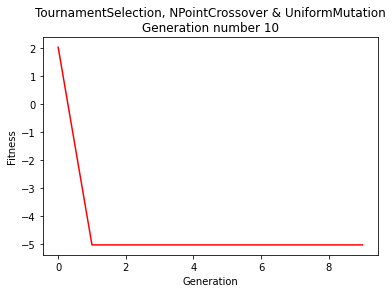

In [154]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 15
SELECTED_SIZE = 10
# NOTA: El número de descendientes está dado de manera estocástica según los operadores de variación, así que es complicado establecer un número fijo de descendientes
# sin embargo rondará los 10 individuos.
OFFSPRING_SIZE = 10
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]

# PIPELINE GA TOURNAMENT SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=3),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=0.1))


In [118]:
ind = initial_population[0]
print(ind.getGenotype())
child = UniformMutation(1).make(ind)
print(child.getGenotype())


[1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0]


Generación: 1, número de descendientes: 6, intensidad: -0.8557545396522357
Generación: 2, número de descendientes: 2, intensidad: -0.5815000933726889
Generación: 3, número de descendientes: 8, intensidad: -0.5656240284956449
Generación: 4, número de descendientes: 8, intensidad: 0.8728715609413645
Generación: 5, número de descendientes: 10, intensidad: -0.43643578047068227
Generación: 6, número de descendientes: 10, intensidad: -0.19999999999641865
Generación: 7, número de descendientes: 10, intensidad: -0.6123724357000588
Generación: 8, número de descendientes: 9, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.33333333333731263
Generación: 10, número de descendientes: 10, intensidad: 0.24999999999925387


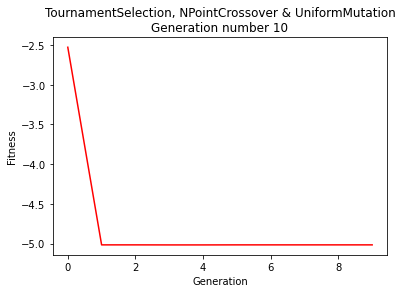

In [153]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 15
SELECTED_SIZE = 10
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, Representation.GRAY)
initial_population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]

# PIPELINE GA TOURNAMENT SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=3),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).

In [120]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Tournament Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Tournament Selection
 x* = [-2.763440860215054], f(x*) = -4.598609968309567


Generación: 1, número de descendientes: 7, intensidad: -0.3119030405678449
Generación: 2, número de descendientes: 8, intensidad: -0.5266478335745322
Generación: 3, número de descendientes: 6, intensidad: -0.006375849437818848
Generación: 4, número de descendientes: 6, intensidad: 0.3707657237696385
Generación: 5, número de descendientes: 11, intensidad: -0.18362389239305008
Generación: 6, número de descendientes: 10, intensidad: 0.24804528444936677
Generación: 7, número de descendientes: 8, intensidad: 0.029116085419903622
Generación: 8, número de descendientes: 8, intensidad: -0.43352161242548515
Generación: 9, número de descendientes: 10, intensidad: 0.1744926061437137
Generación: 10, número de descendientes: 6, intensidad: -0.4442348829473905


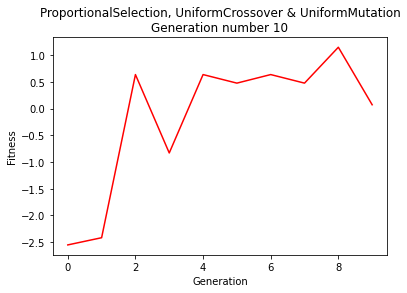

In [121]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=UniformCrossover(probability=CROSSOVER_PROBABILITY, swap_probability=0.5),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


In [122]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [-3.364533], f(x*) = -2.5512277471424607


Generación: 1, número de descendientes: 11, intensidad: -0.7236747258885698
Generación: 2, número de descendientes: 7, intensidad: -0.8284415178376212
Generación: 3, número de descendientes: 8, intensidad: -0.7523017026439565
Generación: 4, número de descendientes: 12, intensidad: -0.8313784820650527
Generación: 5, número de descendientes: 8, intensidad: -0.8728715609439797
Generación: 6, número de descendientes: 8, intensidad: -0.6546536707079975
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 8, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


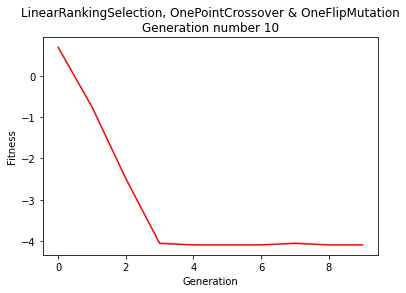

In [123]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=0.8),
                           mutation=OneFlipMutation(probability=0.1))


Generación: 1, número de descendientes: 8, intensidad: -0.8842977085342608
Generación: 2, número de descendientes: 6, intensidad: -0.5440121501285502
Generación: 3, número de descendientes: 10, intensidad: -0.1462807117834234
Generación: 4, número de descendientes: 12, intensidad: -0.6734327556655961
Generación: 5, número de descendientes: 10, intensidad: -0.7637433597544336
Generación: 6, número de descendientes: 12, intensidad: -0.8128411269205221
Generación: 7, número de descendientes: 9, intensidad: 0.0
Generación: 8, número de descendientes: 8, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


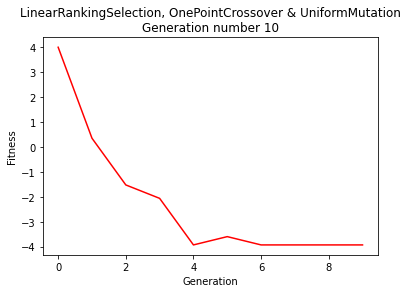

In [124]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=0.8),
                           mutation=UniformMutation(probability=0.1))


In [125]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [-3.2375366568914954], f(x*) = -3.9319532709866074


Generación: 1, número de descendientes: 6, intensidad: -0.2154483925305154
Generación: 2, número de descendientes: 6, intensidad: 0.7470258419279766
Generación: 3, número de descendientes: 7, intensidad: -0.12247357506985292
Generación: 4, número de descendientes: 8, intensidad: -0.1797372462672305
Generación: 5, número de descendientes: 10, intensidad: -1.1163982271025903
Generación: 6, número de descendientes: 8, intensidad: 0.48549901431244635
Generación: 7, número de descendientes: 10, intensidad: -0.34539148339282455
Generación: 8, número de descendientes: 6, intensidad: -0.6755812367317127
Generación: 9, número de descendientes: 11, intensidad: 0.35036410318241856
Generación: 10, número de descendientes: 8, intensidad: 0.16379591125450613


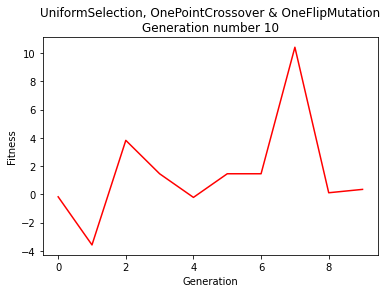

In [126]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [127]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Uniform Selection
 x* = [-3.27663734115347], f(x*) = -3.574445309587613


Generación: 1, número de descendientes: 8, intensidad: -0.30044063972595764
Generación: 2, número de descendientes: 6, intensidad: -0.4551830907567232
Generación: 3, número de descendientes: 10, intensidad: -0.6345638766972721
Generación: 4, número de descendientes: 10, intensidad: -1.0100184523169493
Generación: 5, número de descendientes: 8, intensidad: -1.1519841616760516
Generación: 6, número de descendientes: 10, intensidad: 0.0
Generación: 7, número de descendientes: 8, intensidad: 0.0
Generación: 8, número de descendientes: 11, intensidad: -1013467901034186.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 6, intensidad: 0.0


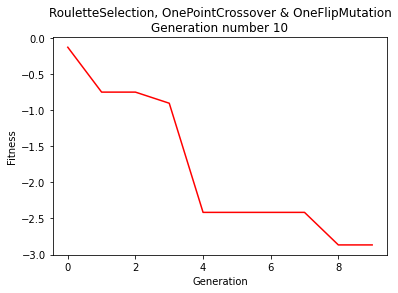

In [128]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [129]:
solution = min(best, key=lambda x: f1(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f1(solution.phenotype)}")

Optimal value with Roulette Selection
 x* = [-3.340175953079179], f(x*) = -2.8665218103234746


#### b) Para el segundo caso (ecuación 2) considerar la representación Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 14, intensidad: -0.9767061129046261
Generación: 2, número de descendientes: 6, intensidad: -1.4675638265534314
Generación: 3, número de descendientes: 12, intensidad: -0.3600939614666372
Generación: 4, número de descendientes: 14, intensidad: 0.0
Generación: 5, número de descendientes: 10, intensidad: 0.0
Generación: 6, número de descendientes: 8, intensidad: 0.0
Generación: 7, número de descendientes: 9, intensidad: -945661028286702.0
Generación: 8, número de descendientes: 12, intensidad: -1.658312395177701
Generación: 9, número de descendientes: 14, intensidad: 0.0
Generación: 10, número de descendientes: 14, intensidad: 0.0


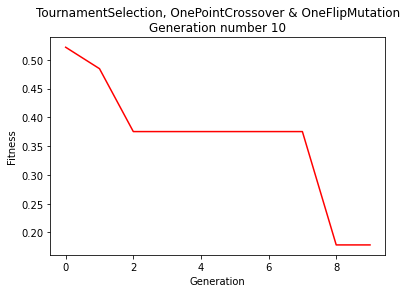

In [130]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, Representation.GRAY)
initial_population = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))



In [131]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value
 x* = [0.09677419354838701, 0.032258064516129004], f(x*) = 0.1783442589796601


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 13, intensidad: -0.37791509378520055
Generación: 2, número de descendientes: 8, intensidad: -0.14773013099522392
Generación: 3, número de descendientes: 10, intensidad: -0.1919133201709431
Generación: 4, número de descendientes: 10, intensidad: 0.18298182321200698
Generación: 5, número de descendientes: 14, intensidad: -0.11481764660574176
Generación: 6, número de descendientes: 12, intensidad: 0.18100869106424253
Generación: 7, número de descendientes: 12, intensidad: 0.34063549171520496
Generación: 8, número de descendientes: 10, intensidad: -0.04985981086062538
Generación: 9, número de descendientes: 11, intensidad: 0.2439526268278636
Generación: 10, número de descendientes: 13, intensidad: -0.14199785293372602


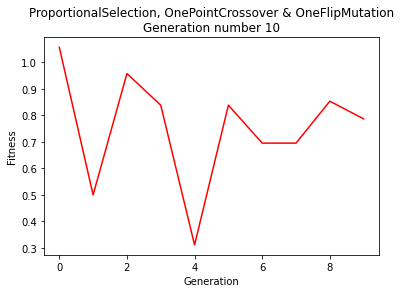

In [132]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [133]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [0.09677419354838701, 0.4193548387096775], f(x*) = 0.3104173277949269


Generación: 1, número de descendientes: 12, intensidad: -0.5993952656645826
Generación: 2, número de descendientes: 12, intensidad: -0.853824724680428
Generación: 3, número de descendientes: 12, intensidad: -0.8457054346214877
Generación: 4, número de descendientes: 12, intensidad: -0.9805806756909174
Generación: 5, número de descendientes: 14, intensidad: 0.28874978427377995
Generación: 6, número de descendientes: 12, intensidad: -1.2870241728509826
Generación: 7, número de descendientes: 10, intensidad: -0.7844645405527371
Generación: 8, número de descendientes: 12, intensidad: -1.2247448713915892
Generación: 9, número de descendientes: 9, intensidad: 0.0
Generación: 10, número de descendientes: 8, intensidad: 0.0


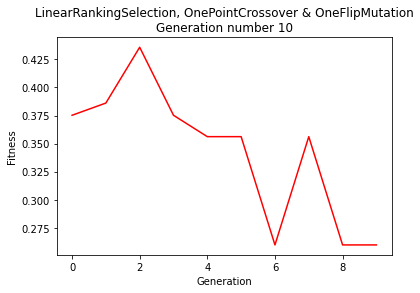

In [134]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [135]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [0.032258064516129004, 0.22580645161290325], f(x*) = 0.25973324615268367


Generación: 1, número de descendientes: 12, intensidad: -0.17548908361573845
Generación: 2, número de descendientes: 4, intensidad: 0.032155709653942974
Generación: 3, número de descendientes: 16, intensidad: 0.1853351831639229
Generación: 4, número de descendientes: 12, intensidad: -0.17577293823251217
Generación: 5, número de descendientes: 10, intensidad: -0.24023623135142885
Generación: 6, número de descendientes: 10, intensidad: -0.04767497471645476
Generación: 7, número de descendientes: 8, intensidad: -0.3034428076017947
Generación: 8, número de descendientes: 12, intensidad: -0.37421574919773376
Generación: 9, número de descendientes: 12, intensidad: -0.2336447731399509
Generación: 10, número de descendientes: 8, intensidad: 0.46710669637194396


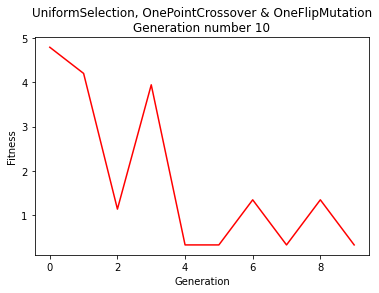

In [136]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f1,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [137]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [-0.032258064516129004, -0.16129032258064524], f(x*) = 0.15509563896251077


Generación: 1, número de descendientes: 14, intensidad: -0.7430295689021635
Generación: 2, número de descendientes: 10, intensidad: -1.4343493249586725
Generación: 3, número de descendientes: 12, intensidad: -0.6171163355936545
Generación: 4, número de descendientes: 10, intensidad: -0.3106677462160186
Generación: 5, número de descendientes: 10, intensidad: -0.6704095294207625
Generación: 6, número de descendientes: 10, intensidad: -0.4754792371142607
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 12, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


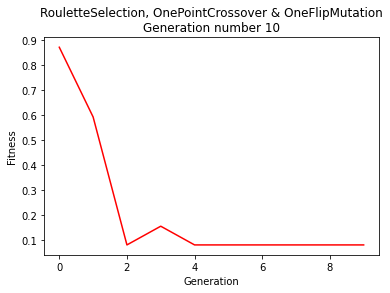

In [138]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f2,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [139]:
solution = min(best, key=lambda x: f2(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f2(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [-0.032258064516129004, -0.22580645161290325], f(x*) = 0.08017233823853531


#### c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos)

Generación: 1, número de descendientes: 12, intensidad: -0.4976842612497559
Generación: 2, número de descendientes: 10, intensidad: -0.886333937093266
Generación: 3, número de descendientes: 14, intensidad: -0.32728412194299156
Generación: 4, número de descendientes: 11, intensidad: -0.2672612419124245
Generación: 5, número de descendientes: 14, intensidad: 0.0
Generación: 6, número de descendientes: 14, intensidad: 0.0
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 8, intensidad: 0.0
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


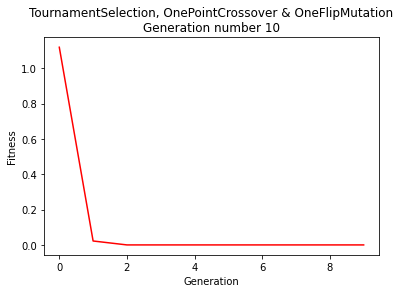

In [140]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [141]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value
 x* = [22.560095, 12.593771, 59.894077, 31.075143], f(x*) = 7.008524060836407e-05


Generación: 1, número de descendientes: 12, intensidad: -0.6650701535496155
Generación: 2, número de descendientes: 8, intensidad: -0.9767031401052393
Generación: 3, número de descendientes: 12, intensidad: -0.5188069997419351
Generación: 4, número de descendientes: 8, intensidad: -0.26726124191242506
Generación: 5, número de descendientes: 14, intensidad: 0.0
Generación: 6, número de descendientes: 8, intensidad: 0.0
Generación: 7, número de descendientes: 12, intensidad: 0.0
Generación: 8, número de descendientes: 15, intensidad: 0.0
Generación: 9, número de descendientes: 10, intensidad: 0.0
Generación: 10, número de descendientes: 10, intensidad: 0.0


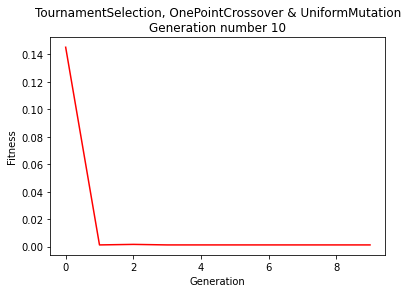

In [142]:
# GA CANONICAL HYPERPARAMETERS
MAX_GENERATION = 10
POPULATION_SIZE = 20
SELECTED_SIZE = 15
OFFSPRING_SIZE = 15
CROSSOVER_PROBABILITY = 0.8
MUTATION_PROBABILITY = 0.01

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, Representation.DECIMAL)
initial_population = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]

# PIPELINE GA
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=TournamentSelection(num_individuals=SELECTED_SIZE, tournament_size=5),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


#### Evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generación: 1, número de descendientes: 12, intensidad: -0.035820798362927016
Generación: 2, número de descendientes: 10, intensidad: -0.3087721212091363
Generación: 3, número de descendientes: 12, intensidad: 0.2222902102468119
Generación: 4, número de descendientes: 12, intensidad: -0.29095117206199356
Generación: 5, número de descendientes: 10, intensidad: -0.039466637690672636
Generación: 6, número de descendientes: 14, intensidad: -0.07637214357532746
Generación: 7, número de descendientes: 10, intensidad: 0.221971149199328
Generación: 8, número de descendientes: 12, intensidad: 0.19926825870158626
Generación: 9, número de descendientes: 8, intensidad: -0.1527183280820415
Generación: 10, número de descendientes: 12, intensidad: -0.23402388649187383


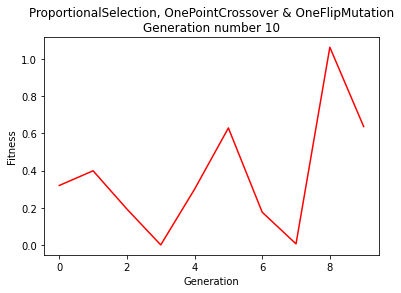

In [143]:
# PIPELINE GA PROPORTIONAL SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=ProportionalSelection(num_individuals=SELECTED_SIZE, delta=10),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [144]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Proportional Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Proportional Selection
 x* = [24.035004, 15.003486, 52.122265, 42.862675], f(x*) = 0.00029350316906290313


Generación: 1, número de descendientes: 14, intensidad: -0.4985334976516592
Generación: 2, número de descendientes: 14, intensidad: -0.5735083034670624
Generación: 3, número de descendientes: 12, intensidad: -0.5393833939337067
Generación: 4, número de descendientes: 12, intensidad: -0.5029526922981106
Generación: 5, número de descendientes: 8, intensidad: -0.5341134702031808
Generación: 6, número de descendientes: 12, intensidad: -0.5012738598125792
Generación: 7, número de descendientes: 14, intensidad: 0.0
Generación: 8, número de descendientes: 16, intensidad: 0.0
Generación: 9, número de descendientes: 8, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


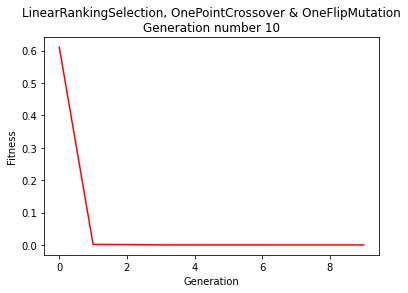

In [145]:
# PIPELINE GA LINEAR RANKING SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=LinearRankingSelection(num_individuals=SELECTED_SIZE, s=2),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


In [146]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Linear Ranking Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")

Optimal value with Linear Ranking Selection
 x* = [14.827491, 20.52109, 52.122265, 42.862675], f(x*) = 6.533410538516421e-05


Generación: 1, número de descendientes: 6, intensidad: -0.2398323913764287
Generación: 2, número de descendientes: 12, intensidad: -0.051081152770165776
Generación: 3, número de descendientes: 12, intensidad: 0.0319171484567609
Generación: 4, número de descendientes: 10, intensidad: 0.35460234767942433
Generación: 5, número de descendientes: 11, intensidad: -0.3464001317896132
Generación: 6, número de descendientes: 11, intensidad: 0.09771506753615013
Generación: 7, número de descendientes: 12, intensidad: 0.05266620808586143
Generación: 8, número de descendientes: 8, intensidad: 0.9525203964223729
Generación: 9, número de descendientes: 14, intensidad: 0.16549698378849964
Generación: 10, número de descendientes: 14, intensidad: 0.1113805268141335


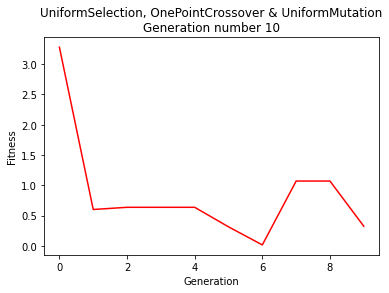

In [147]:
# PIPELINE GA UNIFORM SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=UniformSelection(num_individuals=SELECTED_SIZE),
                           crossover=OnePointCrossover(probability=CROSSOVER_PROBABILITY),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


In [148]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Uniform Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Uniform Selection
 x* = [0.9664610000000025, 20.52109, 34.051591, 40.468502], f(x*) = 0.016870639045545262


Generación: 1, número de descendientes: 12, intensidad: -0.20505259876686063
Generación: 2, número de descendientes: 12, intensidad: -0.5163463762322176
Generación: 3, número de descendientes: 14, intensidad: -0.5422458438502659
Generación: 4, número de descendientes: 10, intensidad: -0.4595442322130185
Generación: 5, número de descendientes: 10, intensidad: -0.6150663786792436
Generación: 6, número de descendientes: 12, intensidad: -0.7897033166226398
Generación: 7, número de descendientes: 12, intensidad: -0.43656417766372385
Generación: 8, número de descendientes: 10, intensidad: -0.3922322702763681
Generación: 9, número de descendientes: 12, intensidad: 0.0
Generación: 10, número de descendientes: 12, intensidad: 0.0


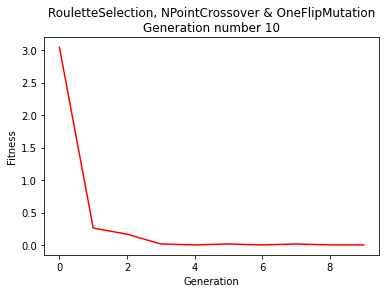

In [149]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=OneFlipMutation(probability=MUTATION_PROBABILITY))


Generación: 1, número de descendientes: 14, intensidad: -0.37625458884885044
Generación: 2, número de descendientes: 10, intensidad: -0.10012618686691359
Generación: 3, número de descendientes: 12, intensidad: -0.525877214344509
Generación: 4, número de descendientes: 10, intensidad: -0.34234317912009893
Generación: 5, número de descendientes: 14, intensidad: -0.34857288191875513
Generación: 6, número de descendientes: 11, intensidad: -0.6779267433929639
Generación: 7, número de descendientes: 11, intensidad: -0.7312032099973023
Generación: 8, número de descendientes: 8, intensidad: -0.5105635836772601
Generación: 9, número de descendientes: 6, intensidad: -0.9633925012378662
Generación: 10, número de descendientes: 14, intensidad: -0.5856895078333246


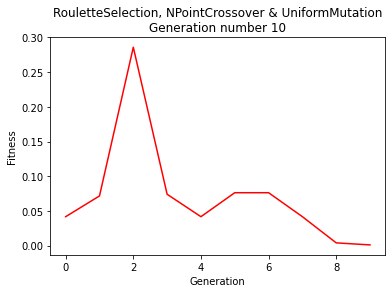

In [150]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


Generación: 1, número de descendientes: 11, intensidad: 0.028430727836563797
Generación: 2, número de descendientes: 10, intensidad: -0.18129917662683778
Generación: 3, número de descendientes: 14, intensidad: -0.6489241136323508
Generación: 4, número de descendientes: 11, intensidad: -0.28868057176360473
Generación: 5, número de descendientes: 14, intensidad: -0.8810022595836883
Generación: 6, número de descendientes: 12, intensidad: -0.6744056234902288
Generación: 7, número de descendientes: 8, intensidad: -0.516397727073273
Generación: 8, número de descendientes: 10, intensidad: -0.5000000000000008
Generación: 9, número de descendientes: 13, intensidad: 89049161748053.0
Generación: 10, número de descendientes: 13, intensidad: -0.26726124191242556


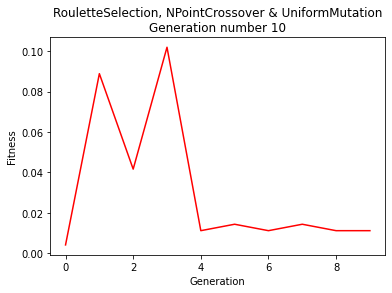

In [151]:
# PIPELINE GA ROULETTE SELECTION
best = genenetic_algorithm(max_generation=MAX_GENERATION,
                           fitness=f3,
                           population=initial_population,
                           selection=RouletteSelection(num_individuals=SELECTED_SIZE),
                           crossover=NPointCrossover(probability=CROSSOVER_PROBABILITY, n=2),
                           mutation=UniformMutation(probability=MUTATION_PROBABILITY))


In [152]:
solution = min(best, key=lambda x: f3(x.phenotype))
print(f"Optimal value with Roulette Selection\n x* = {solution.phenotype}, f(x*) = {f3(solution.phenotype)}")


Optimal value with Roulette Selection
 x* = [16.755647, 34.86496, 48.674694, 57.467663], f(x*) = 0.004168696927179114
